In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import joblib
from flask import Flask, render_template, request


In [2]:
# Load dataset
data = pd.read_csv('placement_data.csv')

# Check for missing values
print(data.isnull().sum())

# Display first few rows of the dataset
print(data.head())



Student_ID                    0
CGPA                          0
Internships                   0
Projects                      0
Certifications                0
Extracurricular_Activities    0
Aptitude_Test_Score           0
Mock_Interview_Score          0
Placement_Status              0
dtype: int64
   Student_ID  CGPA  Internships  Projects  Certifications  \
0           1  7.50            2         1               1   
1           2  9.80            3         3               1   
2           3  8.93            1         4               0   
3           4  8.39            3         4               1   
4           5  6.62            3         1               0   

   Extracurricular_Activities  Aptitude_Test_Score  Mock_Interview_Score  \
0                           1                   72                    97   
1                           1                   90                    69   
2                           5                   74                    88   
3                     

In [3]:
# Handle missing values (if any)
data.fillna(data.mean(), inplace=True)

# Feature scaling
scaler = StandardScaler()
scaled_columns = ['CGPA', 'Internships', 'Projects','Certifications', 'Extracurricular_Activities', 'Aptitude_Test_Score', 'Mock_Interview_Score']
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])

# Drop irrelevant columns or those that won't help the model
data = data.drop(['Student_ID'], axis=1)

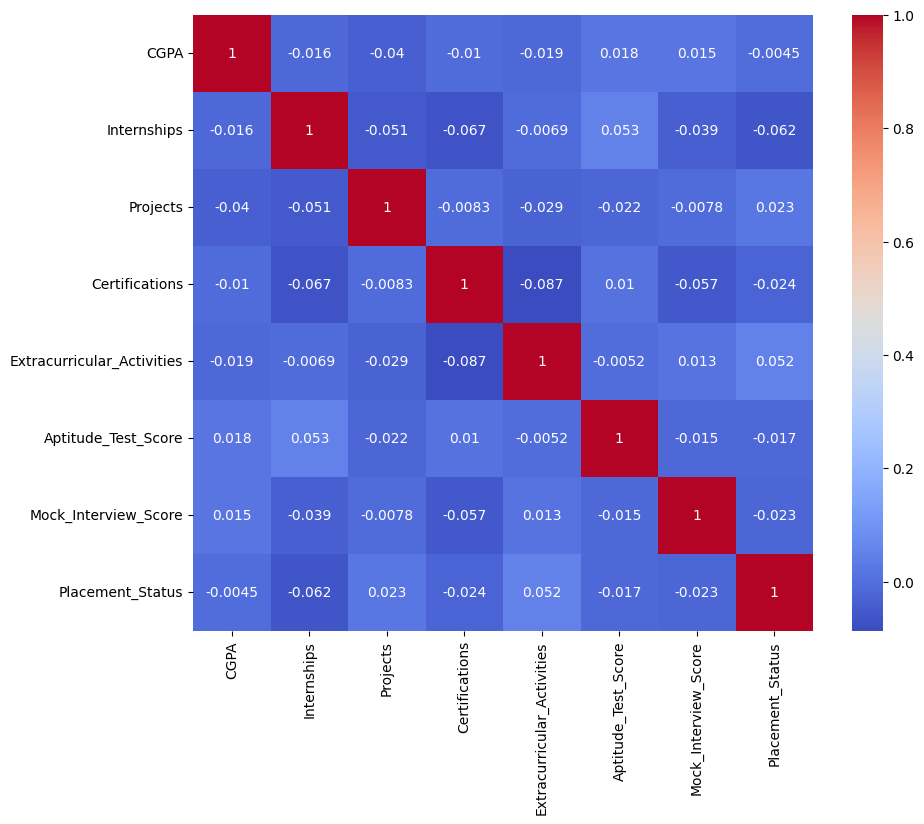

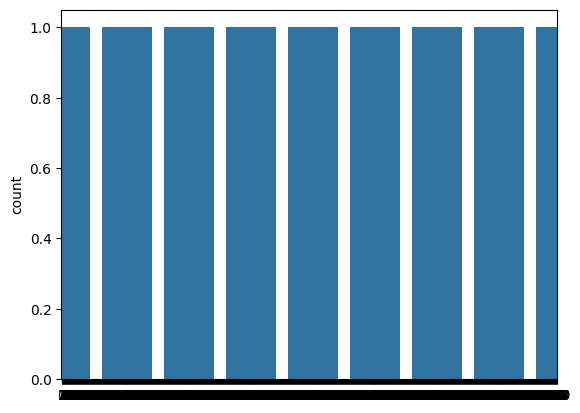

In [4]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Distribution of placement status
sns.countplot(data['Placement_Status'])
plt.show()


In [5]:
# Splitting the data into features (X) and target (y)
X = data.drop('Placement_Status', axis=1)
y = data['Placement_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate model performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters

print(f"Best Parameters: {grid_search.best_params_}")

# Use the best estimator
best_clf = grid_search.best_estimator_

# Predict and evaluate again with the tuned model
y_pred_tuned = best_clf.predict(X_test)
print(f"Tuned Model Accuracy: {accuracy_score(y_test, y_pred_tuned)}")
print(f"Tuned Model ROC-AUC Score: {roc_auc_score(y_test, y_pred_tuned)}")
print(confusion_matrix(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))


# After training, save the model and scaler
joblib.dump(best_clf, 'placement_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


Accuracy: 0.485
ROC-AUC Score: 0.48197115384615385
[[39 57]
 [46 58]]
              precision    recall  f1-score   support

           0       0.46      0.41      0.43        96
           1       0.50      0.56      0.53       104

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Tuned Model Accuracy: 0.55
Tuned Model ROC-AUC Score: 0.5452724358974359
[[41 55]
 [35 69]]
              precision    recall  f1-score   support

           0       0.54      0.43      0.48        96
           1       0.56      0.66      0.61       104

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.54       200
weighted avg       0.55      0.55      0.54       200



['scaler.pkl']